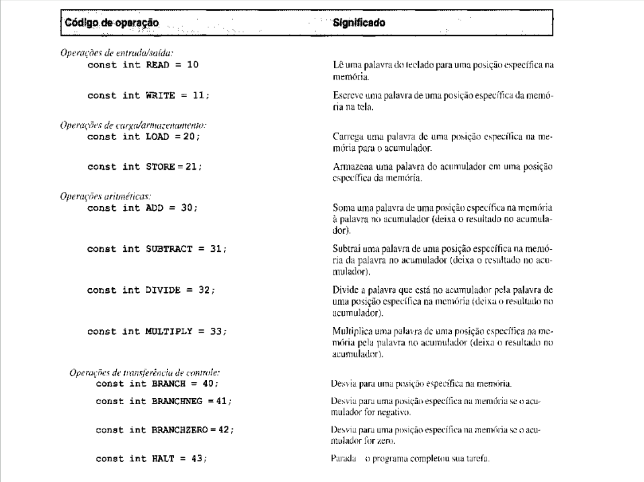

In [1]:
from IPython.display import Image
Image(filename='Comandos processador.png')


In [ ]:
memory = ['0000']*30

def writeMEM(address):
    value = input(f'ENDEREÇO {bin(address)[2::].zfill(5)} -> ')
    memory[address] = value

def store(address, value):
    memory[address] = value

def load(address):
    return memory[address]

def add(op, r0):
    op1 = int(load(op))
    r0 += op1
    return r0

def sub(op, r0):
    op1 = int(load(op))
    r0 -= op1
    return r0

def mult(op, r0):
    op1 = int(load(op))
    r0 *= op1
    return r0

def div(op, r0):
    op1 = int(load(op))
    r0 /= op1
    return r0

def jz(r0, op):
    if r0 == 0:
        return op
    return None
         
def jn(r0, op):
    if r0 < 0:
        return op
    return None

def jmp(op):
    return op

def get():
    memory[op] = input('-> ')

print("""==================================================================
                      BEM VINDO AO SIMPLETRON!
==================================================================
AQUI ESTÃO ALGUMAS INFORMAÇÕES IMPORTANTE ANTES DE COMEÇAR.
- OS CONTEÚDOS DAS CÉLULAS PRECISAM SER INSERIDOS UM DE CADA VEZ
- '-99999' É O COMANDO DE PARADA\n""")

address = 0
while True:
    writeMEM(address)
    if memory[address] == '-99999':
        print('\n+=+ Instruções e dados completos. +=+')
        break
    address += 1



pc = rem = rdm = ri = op = r0 = 0
while True:
    rem = pc
    pc += 1
    rdm = load(rem)
    ri = int(rdm[:2])
    op = int(rdm[2::])
    if ri == 43: # HALT
        print('FINALIZANDO...')
        break
    elif ri == 20:
         r0 = int(load(op))
    elif ri == 21:
        store(op, r0)
    elif ri == 30:
        r0 = add(op, r0)
    elif ri == 31:
        r0 = sub(op, r0)
    elif ri == 32:
        r0 = div(op, r0)
    elif ri == 33:
        r0 = mult(op, r0)
    elif ri == 40:
        pc = jmp(op)
    elif ri == 41:
        pc1 = jn(r0, op)
        if pc1 is not None:
            pc = pc1
    elif ri == 42:
        pc1 = jz(r0, op)
        if pc1 is not None:
            pc = pc1
    elif ri == 10:
        get()
    elif ri == 11:
        print(f'= {memory[op]}')

print(f"""==================================================================
                              RESUMO
==================================================================
PC = {pc}
RI = {rdm}
R0 = {r0}\n""")

print('ESTADO DA MEMÓRIA ')
address = 0
for i in range(len(memory)):
    #print(f'{bin(address)[2::].zfill(5)} -> {memory[i]}')
    print(f'{address} -> {memory[i]}')
    address += 1

CONJUNTOS DE INTRUÇÕES DAS OPERAÇÕES DESCRITAS:

 memory = ['1007', '1008', '2007', '3008', '2109', '1109', '4300', '0000', '0000', '0000', '-99999'] -> Soma de 2 números

 memory = ['1006', '2006', '3306', '2106', '1106', '4300', '0000', '-99999'] -> X^2